<a href="https://colab.research.google.com/github/mangleshpatidar/DO101-apps/blob/master/2023201059_A1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [2]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


In [3]:
#Use CART Decision Tree
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=15, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        best_feature, best_thresh = self._best_split(X, y, feat_idxs)


        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [4]:
df=pd.read_csv('Q1Data.csv')
df=df.iloc[:,:6].join(df.iloc[:,22])
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,Genus
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,Adenomera
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,Adenomera
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,Adenomera
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,Adenomera
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,Adenomera
...,...,...,...,...,...,...,...
3433,0.274109,0.194965,0.607531,0.195232,-0.023337,-0.090335,Adenomera
3434,0.287921,0.220623,0.657943,0.269236,0.027522,-0.134501,Adenomera
3435,0.290192,0.223692,0.577994,0.258529,0.012110,-0.126663,Adenomera
3436,0.248281,0.227145,0.611145,0.192622,-0.023543,-0.126326,Adenomera


In [5]:
encoder= LabelEncoder()

df['Genus']=encoder.fit_transform(df['Genus'])
print(df)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  Genus
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945      0
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835      0
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714      0
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501      0
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884      0
...        ...       ...       ...       ...       ...       ...    ...
3433  0.274109  0.194965  0.607531  0.195232 -0.023337 -0.090335      0
3434  0.287921  0.220623  0.657943  0.269236  0.027522 -0.134501      0
3435  0.290192  0.223692  0.577994  0.258529  0.012110 -0.126663      0
3436  0.248281  0.227145  0.611145  0.192622 -0.023543 -0.126326      0
3437  0.291810       NaN       NaN       NaN       NaN       NaN      2

[3438 rows x 7 columns]


In [6]:
scaler=StandardScaler()
X=df.iloc[:,:6].values
X=scaler.fit_transform(X)
X

array([[-0.87924818, -1.4005196 , -1.66855659,  0.9919625 ,  1.91092709,
         0.58968614],
       [-0.76334909, -1.37042991, -1.25752999,  1.12885299,  1.98333469,
         0.38952053],
       [-0.88310701, -1.29759904, -1.14398573,  0.72936841,  1.23451121,
         0.12941149],
       ...,
       [-0.02389391,  0.09813811,  0.62185868,  0.61788684, -0.46143409,
        -0.54618277],
       [-0.28507676,  0.11385366,  0.82312375,  0.19769205, -0.8015942 ,
        -0.54450316],
       [-0.01381254,         nan,         nan,         nan,         nan,
                nan]])

In [7]:
y=df.iloc[:,-1].values

y

array([0, 0, 0, ..., 0, 0, 2])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state=0)

In [9]:
train_accuracy = []
test_accuracy = []
max_depth_values = list(range(1, 16))

for depth in max_depth_values:
    model = DecisionTree(max_depth=depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))
    test_accuracy.append(accuracy_score(y_test, y_test_pred))


In [12]:
print(max_depth_values)
print(train_accuracy)
print(test_accuracy)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0.8748180494905385, 0.8777292576419214, 0.9286754002911208, 0.9403202328966521, 0.9636098981077147, 0.9723435225618632, 0.9868995633187773, 0.9912663755458515, 0.9912663755458515, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8520537986186841, 0.881497637222828, 0.9113049800072701, 0.9065794256633951, 0.9287531806615776, 0.9429298436932024, 0.9458378771355871, 0.9436568520537986, 0.9418393311523082, 0.9440203562340967, 0.9400218102508179, 0.9392948018902217, 0.9472918938567794, 0.9400218102508179, 0.9472918938567794]


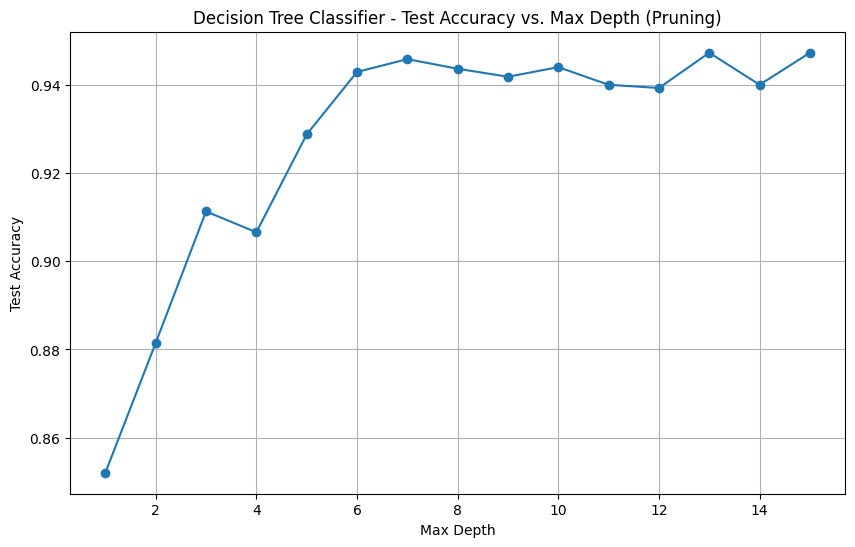

In [13]:

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, test_accuracy, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.title('Decision Tree Classifier - Test Accuracy vs. Max Depth (Pruning)')
plt.grid(True)
plt.show()


In [ ]:
#Observation from the graph plotted above is
#Max depth increases also test accuracy also increases
# till at max depth is 8  where test accuracy is maximum around 0.88
#  till at max depth is 9  where test accuracy is maximum around 0.88
# after that accuracy decreses

In [14]:
df1=pd.read_csv('Q1Data.csv')
df1

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_9   7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [16]:
df1 = df1.iloc[:, :-3].join(df1.iloc[:, -2])
df1

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Genus
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Adenomera
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Adenomera
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Adenomera
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Adenomera
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Adenomera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Scinax
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Scinax
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Scinax
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Scinax


In [17]:
encoder= LabelEncoder()
df1['Genus']=encoder.fit_transform(df1['Genus'])
print(df1)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

In [18]:
scaler=StandardScaler()

In [19]:
X1=df1.iloc[:,0:21].values
X1=scaler.fit_transform(X1)
X1.shape

(7195, 21)

In [20]:
y1=df1.iloc[:,-1].values

y1.shape

(7195,)

In [21]:
class KNN:
  def __init__(self,k):
    self.n_neighbors=k
    self.X_train=None
    self.y_train=None

  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self,X_test):
    y_pred=[]
    for i in X_test:
      distances =[]
      for j in self.X_train:
        distances.append(self.calculate_distance(i,j))
      n_neighbors=sorted(list(enumerate(distances)),key=lambda x:x[1])[0:self.n_neighbors]
      label = self.majority_count(n_neighbors)
      y_pred.append(label)
    return np.array(y_pred)

  def calculate_distance(self,point_A,point_B):
    return np.linalg.norm(point_A - point_B)
  def majority_count(self,neighbors):
    votes=[]
    for i in neighbors:
      votes.append(self.y_train[i[0]])
    votes = Counter(votes)
    return votes.most_common()[0][0]




In [22]:
X_temp1, X_test1, y_temp1, y_test1 = train_test_split(X1, y1, test_size=0.1, random_state=0)


X_train1, _, y_train1, _ = train_test_split(X_temp1, y_temp1, test_size=1/3, random_state=0)


In [23]:
k_values=list(range(1,51))
accuracies11=[]
for k_value in k_values:
  apnaKnn= KNN(k=k_value)
  apnaKnn.fit(X_train1,y_train1)
  y_pred1=apnaKnn.predict(X_test1)
  accuracy=accuracy_score(y_test1,y_pred1)
  accuracies11.append(accuracy)

In [25]:
print(accuracies11)

[0.9902777777777778, 0.9902777777777778, 0.9875, 0.9902777777777778, 0.9888888888888889, 0.9902777777777778, 0.9888888888888889, 0.9888888888888889, 0.9833333333333333, 0.9861111111111112, 0.9833333333333333, 0.9819444444444444, 0.9791666666666666, 0.9777777777777777, 0.9763888888888889, 0.9763888888888889, 0.9763888888888889, 0.975, 0.9763888888888889, 0.975, 0.9722222222222222, 0.9694444444444444, 0.9666666666666667, 0.9652777777777778, 0.9638888888888889, 0.9652777777777778, 0.9638888888888889, 0.9638888888888889, 0.9652777777777778, 0.9611111111111111, 0.9611111111111111, 0.9611111111111111, 0.9597222222222223, 0.9597222222222223, 0.9569444444444445, 0.9569444444444445, 0.9583333333333334, 0.9569444444444445, 0.9569444444444445, 0.9569444444444445, 0.9569444444444445, 0.9569444444444445, 0.9527777777777777, 0.9513888888888888, 0.95, 0.9513888888888888, 0.95, 0.9486111111111111, 0.95, 0.9486111111111111]


In [26]:
print(len(accuracies11))

50


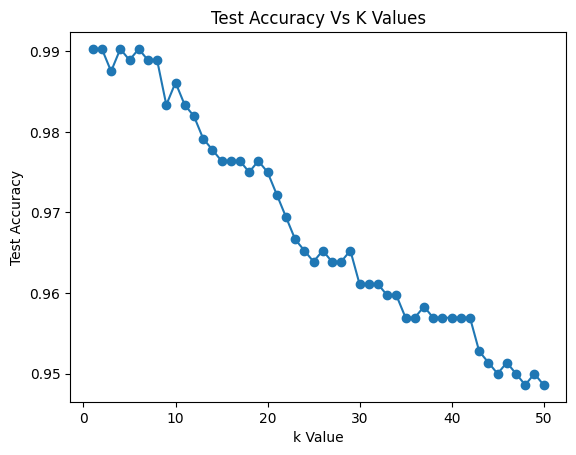

In [27]:
plt.plot(k_values, accuracies11,marker='o')
plt.title('Test Accuracy Vs K Values')
plt.xlabel('k Value')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
#Report of the above graph
#as the K value increase test accuracy decreases
# The accuracies range from approximately 0.95 to 0.99 as K varies from 1 to 50.
# The accuracy generally remains high, fluctuating between 0.95 and 0.99 across different values of K.

In [ ]:
#################################################################################

In [28]:
df2=pd.read_csv('Q1Data.csv')
df2

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [29]:
encoder= LabelEncoder()
df2['Family']=encoder.fit_transform(df2['Family'])
df2['Genus']=encoder.fit_transform(df2['Genus'])
df2['Species']=encoder.fit_transform(df2['Species'])
print(df2)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_15  MFCCs_16  MF

In [30]:
scaler=StandardScaler()

In [31]:
X_data=df2.iloc[:,0:22].join(df2.iloc[:,23:])
print(X_data)
X2=X_data.values
X2=scaler.fit_transform(X2)
X2.shape

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_14  MFCCs_15  MF

(7195, 23)

In [32]:

y2=df2.iloc[:,-2].values
print(y2)
y2.shape

[0 0 0 ... 7 7 7]


(7195,)

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.2, random_state=0)

In [34]:
train_accuracy1 = []
test_accuracy1 = []
max_depth_values = list(range(1, 16))

for depth in max_depth_values:
    model2 = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model2.fit(X_train2, y_train2)
    y_train_pred2 = model2.predict(X_train2)
    y_test_pred2 = model2.predict(X_test2)
    train_accuracy1.append(accuracy_score(y_train2, y_train_pred2))
    test_accuracy1.append(accuracy_score(y_test2, y_test_pred2))



In [35]:
print(train_accuracy1)
print(test_accuracy1)

[0.7963863794301599, 0.8740444753300903, 0.9537873523280056, 0.9741139680333565, 0.9904447533009034, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.8054204308547602, 0.8714384989576095, 0.9555246699096595, 0.9770674079221682, 0.9909659485753995, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[Text(0.3, 0.9285714285714286, 'x[22] <= -0.414\ngini = 0.61\nsamples = 5756\nvalue = [3315, 447, 242, 1269, 217, 94, 55, 117]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 3315\nvalue = [3315, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.4, 0.7857142857142857, 'x[22] <= 0.504\ngini = 0.674\nsamples = 2441\nvalue = [0, 447, 242, 1269, 217, 94, 55, 117]'),
 Text(0.2, 0.6428571428571429, 'x[22] <= 0.045\ngini = 0.456\nsamples = 689\nvalue = [0, 447, 242, 0, 0, 0, 0, 0]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 447\nvalue = [0, 447, 0, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0, 0, 0, 0, 0]'),
 Text(0.6, 0.6428571428571429, 'x[22] <= 1.422\ngini = 0.452\nsamples = 1752\nvalue = [0, 0, 0, 1269, 217, 94, 55, 117]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 1269\nvalue = [0, 0, 0, 1269, 0, 0, 0, 0]'),
 Text(0.7, 0.5, 'x[22] <= 1.881\ngini = 0.689\nsamples = 483\nvalue = [0, 0, 0, 0, 217, 94, 55, 117]'),
 Text(0.6, 0.35714285714285715, 'gini = 0.0\nsamples

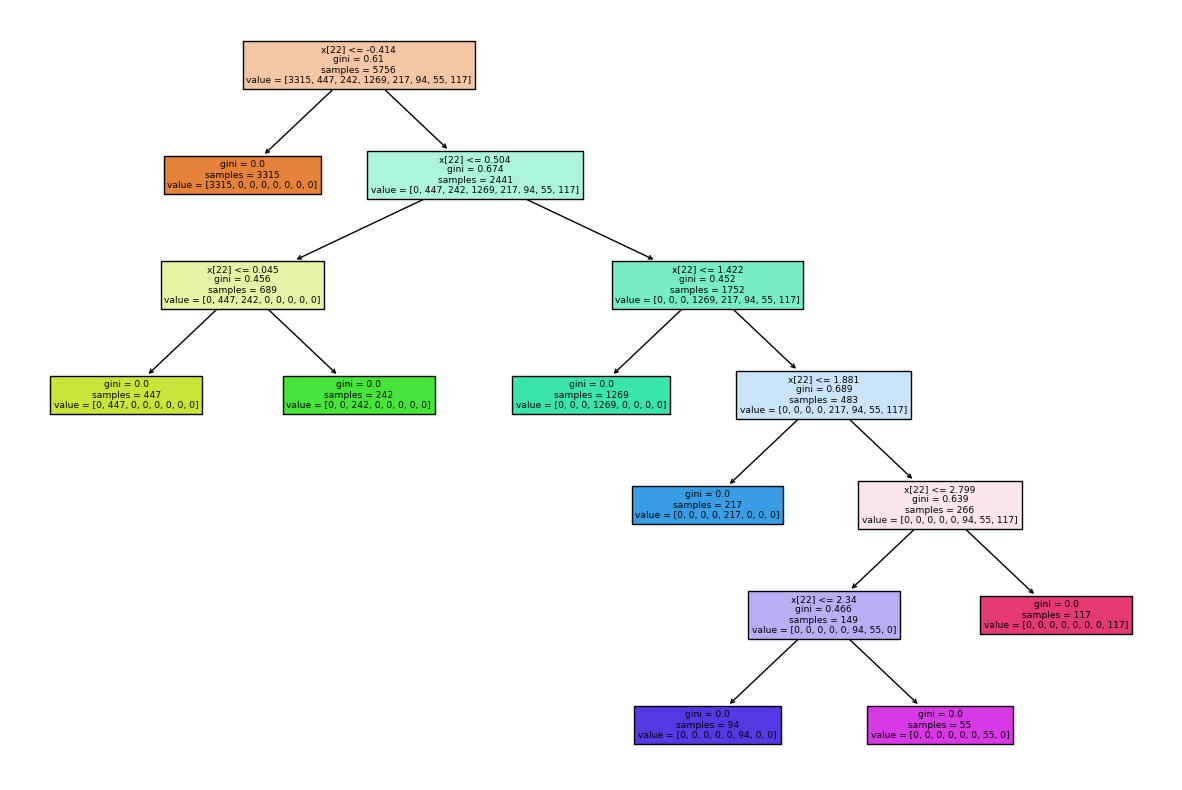

In [36]:
plt.figure(figsize=(15,10))
tree.plot_tree(model2,filled=True)

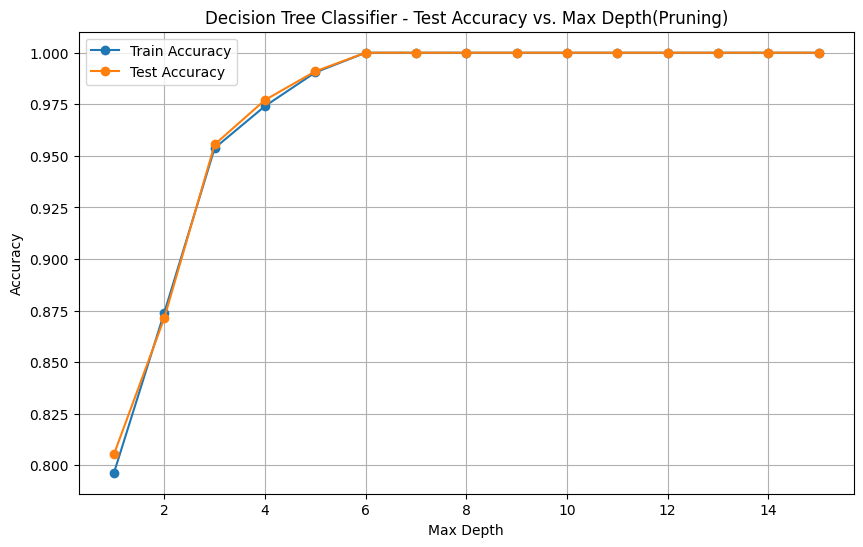

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracy1, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_accuracy1, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier - Test Accuracy vs. Max Depth(Pruning)')
plt.legend()
plt.grid(True)
plt.show()

In [38]:

mean_train_accuracy = np.mean(train_accuracy1)
mean_test_accuracy = np.mean(test_accuracy1)

print(f'Mean Train Accuracy: {mean_train_accuracy:.4f}')
print(f'Mean Test Accuracy: {mean_test_accuracy:.4f}')

Mean Train Accuracy: 0.9726
Mean Test Accuracy: 0.9734


In [ ]:
#############################################################################

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [40]:
df3=pd.read_csv('Q1Data.csv')
df3

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


In [41]:
encoder= LabelEncoder()
df3['Family']=encoder.fit_transform(df3['Family'])
df3['Genus']=encoder.fit_transform(df3['Genus'])
df3['Species']=encoder.fit_transform(df3['Species'])
print(df3)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_15  MFCCs_16  MF

In [42]:
scaler=StandardScaler()

In [43]:
X_data3=df3.iloc[:,0:22].join(df3.iloc[:,23:])
print(X_data3)
X3=X_data3.values
X3=scaler.fit_transform(X3)
X3.shape

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0     0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1     0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2     0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3     0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4     0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   
...        ...       ...       ...       ...       ...       ...       ...   
7190 -0.554504 -0.337717  0.035533  0.034511  0.443451  0.093889 -0.100753   
7191 -0.517273 -0.370574  0.030673  0.068097  0.402890  0.096628 -0.116460   
7192 -0.582557 -0.343237  0.029468  0.064179  0.385596  0.114905 -0.103317   
7193 -0.519497 -0.307553 -0.004921  0.072865  0.377131  0.086866 -0.115799   
7194 -0.508833 -0.324106  0.062068  0.078211  0.397188  0.094596 -0.117672   

      MFCCs_ 8   MFCCs_9  MFCCs_10  ...  MFCCs_14  MFCCs_15  MF

(7195, 23)

In [44]:
y3=df3.iloc[:,-2].values
print(y3)
y3.shape

[0 0 0 ... 7 7 7]


(7195,)

In [45]:
print("Number of samples in X:", len(X3))
print("Number of samples in y:", len(y3))

Number of samples in X: 7195
Number of samples in y: 7195


In [46]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3, test_size=0.2, random_state=0)


In [47]:
k_values=list(range(1,1001))
accuracies2=[]
for k_value in k_values:
  knn= KNeighborsClassifier(n_neighbors=k_value)
  knn.fit(X_train3,y_train3)
  y_pred3=knn.predict(X_test3)
  accuracy0=accuracy_score(y_test3,y_pred3)
  accuracies2.append(accuracy0)

In [48]:
print(accuracies2)

[0.9930507296733843, 0.9923558026407228, 0.9909659485753995, 0.990271021542738, 0.9916608756080612, 0.9909659485753995, 0.9909659485753995, 0.9895760945100764, 0.9888811674774148, 0.9888811674774148, 0.9881862404447533, 0.9881862404447533, 0.9888811674774148, 0.9874913134120917, 0.9867963863794301, 0.985406532314107, 0.985406532314107, 0.985406532314107, 0.9840166782487839, 0.9819318971507992, 0.9826268241834607, 0.980542043085476, 0.9798471160528145, 0.9784572619874913, 0.9777623349548298, 0.9784572619874913, 0.9777623349548298, 0.9770674079221682, 0.9763724808895066, 0.9770674079221682, 0.9763724808895066, 0.9763724808895066, 0.9763724808895066, 0.9763724808895066, 0.9749826268241835, 0.9756775538568451, 0.9749826268241835, 0.9756775538568451, 0.9742876997915219, 0.9742876997915219, 0.9749826268241835, 0.9742876997915219, 0.9735927727588604, 0.9742876997915219, 0.9735927727588604, 0.9735927727588604, 0.9722029186935371, 0.9722029186935371, 0.9722029186935371, 0.9722029186935371, 0.97

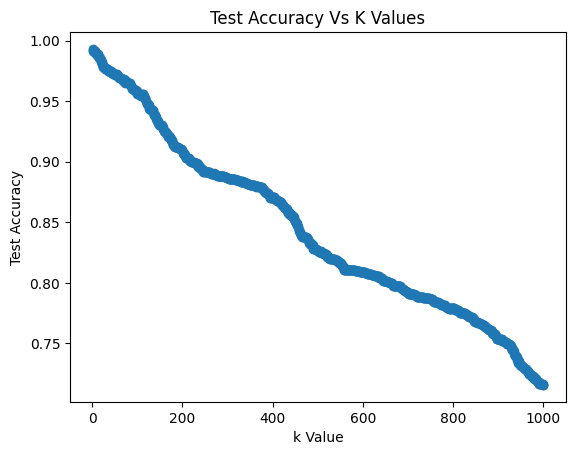

In [49]:
plt.plot(k_values, accuracies2,marker='o')
plt.title('Test Accuracy Vs K Values')
plt.xlabel('k Value')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
# k_values=list(range(1,51))
# accuracies_50=[]
# for k_value in k_values:
#   knn= KNeighborsClassifier(n_neighbors=k_value)
#   knn.fit(X_train3,y_train3)
#   y_pred3=knn.predict(X_test3)
#   accuracy_50=accuracy_score(y_test3,y_pred3)
#   accuracies_50.append(accuracy_50)

In [50]:
print(len(test_accuracy))
print(len(test_accuracy1))
print(len(accuracies11))
print(len(accuracies2))

15
15
50
1000


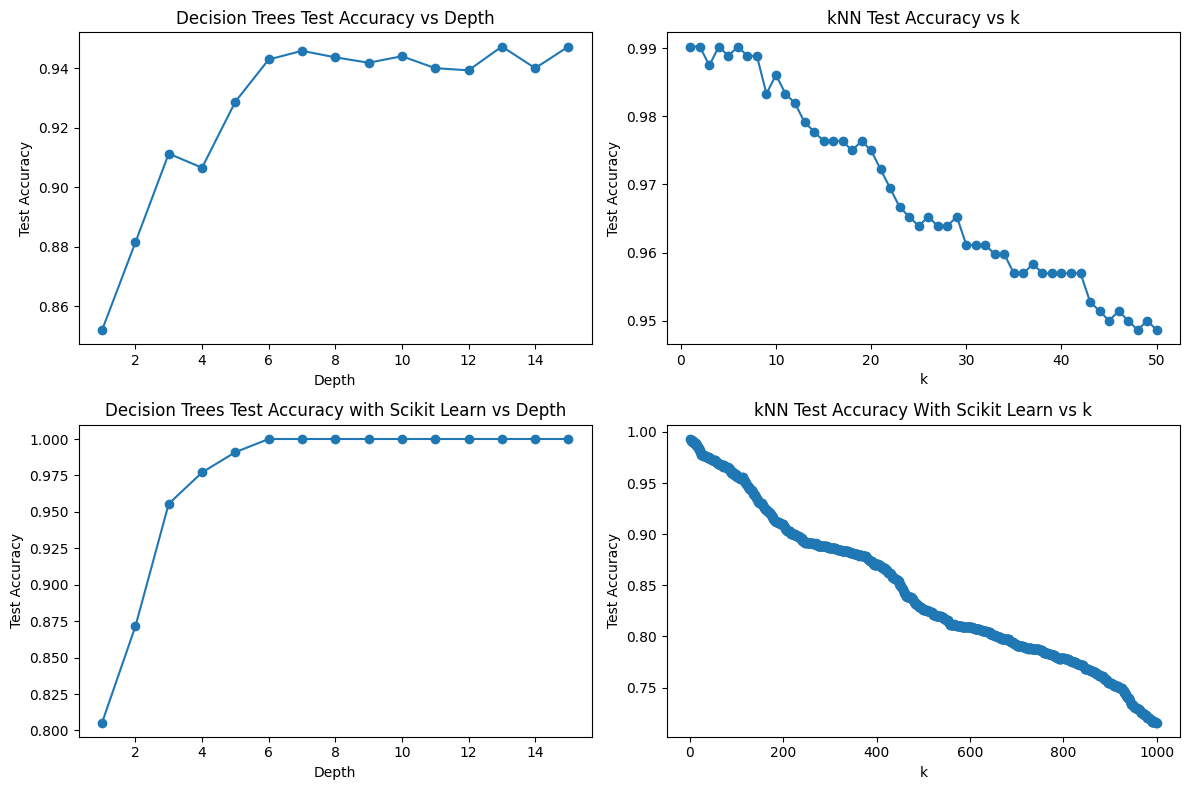

In [51]:

# Plotting the test accuracies for Decision Trees and kNN on subplots
plt.figure(figsize=(12, 8))

# Decision Trees subplot
plt.subplot(2, 2, 1)
plt.plot(range(1, 16), test_accuracy, marker='o', linestyle='-')
plt.title('Decision Trees Test Accuracy vs Depth')
plt.xlabel('Depth')
plt.ylabel('Test Accuracy')

# k Nearest Neighbors subplot
plt.subplot(2, 2, 2)
plt.plot(range(1, 51),accuracies11, marker='o', linestyle='-')
plt.title('kNN Test Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Test Accuracy')

##Scikit Learn
# Decision Trees subplot
plt.subplot(2, 2, 3)
plt.plot(range(1, 16), test_accuracy1, marker='o', linestyle='-')
plt.title('Decision Trees Test Accuracy with Scikit Learn vs Depth')
plt.xlabel('Depth')
plt.ylabel('Test Accuracy')

# k Nearest Neighbors subplot
plt.subplot(2, 2, 4)
plt.plot(range(1, 1001), accuracies2, marker='o', linestyle='-')
plt.title('kNN Test Accuracy With Scikit Learn vs k')
plt.xlabel('k')
plt.ylabel('Test Accuracy')

# Show the plots
plt.tight_layout()
plt.show()